<a href="https://colab.research.google.com/github/sandracumic/Test-Cross-Masters-s.r.o./blob/main/Test_Cross_Masters_s_r_o_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TEST CROSS MASTERS S.R.O.**

**Pozice: Začínající Datový Analytik**

**Jméno: MSc Sandra Čumić**

**Datum: 26.03.**

In [109]:
from google.colab import files
uploaded = files.upload()


Saving Data.xlsx to Data (3).xlsx


In [110]:
import pandas as pd
soubor = pd.ExcelFile('Data.xlsx')
soubor.sheet_names


['Transactions', 'Products']

In [111]:
# objednávky
transakce = soubor.parse("Transactions")

# produkty
produkty = soubor.parse("Products")


In [112]:
# Spojení tabulek podle názvu produktu
spojeno = pd.merge(transakce, produkty, on="Product name")


In [113]:
# Nový sloupec s výpočtem obratu
spojeno["Obrat"] = spojeno["Price"] * spojeno["Quantity"]


In [143]:
# Převedení sloupece Date na datumový formát
spojeno["Date"] = pd.to_datetime(spojeno["Date"])

# Vytvoření sloupece Měsíc
spojeno["Mesic"] = spojeno["Date"].dt.to_period("M")

# Vytvoření sloupce Den v týdnu (0 = pondělí, 6 = neděle)
spojeno["Den_v_tydnu"] = spojeno["Date"].dt.dayofweek

# Spojení tabulek a výpočet obratu
merged_df = pd.merge(transactions_df, products_df, on="Product name")
merged_df["Revenue"] = merged_df["Price"] * merged_df["Quantity"]
merged_df["Date"] = pd.to_datetime(merged_df["Date"])
merged_df["Month"] = merged_df["Date"].dt.to_period("M")

# Výpočet měsíčního obratu podle kategorie
monthly_revenue_by_category = merged_df.groupby(["Month", "Category"])["Revenue"].sum().unstack()

# Zobrazení tabulky
from IPython.display import display, HTML
display(HTML('<h4>Měsíční obrat podle kategorie</h4>' + monthly_revenue_by_category.to_html()))

from IPython.display import Markdown, display
display(Markdown(
    "**Tabulka ukazuje měsíční obrat jednotlivých produktových kategorií (Audio, Mobilní telefony, Tablety, Televize) v období únor–květen 2022. Data byla získána spojením objednávek a produktů, a následně agregována podle měsíce a kategorie.**"
))



Category,Audio,Mobilní telefony,Tablety,Televize
Month,,,,
2022-02,130310,208690,188890,290920
2022-03,107820,157710,164910,380900
2022-04,107840,177510,171910,266930
2022-05,70400,70550,97950,266930


**Tabulka ukazuje měsíční obrat jednotlivých produktových kategorií (Audio, Mobilní telefony, Tablety, Televize) v období únor–květen 2022. Data byla získána spojením objednávek a produktů, a následně agregována podle měsíce a kategorie.**

In [164]:
# Výpočet celkového obratu a prodaného množství podle kategorie
obrat_kusy = spojeno.groupby("Category").agg({
    "Obrat": "sum",
    "Quantity": "sum"
}).reset_index()

# Výpočet průměrného obratu na kus
obrat_kusy["Průměrný obrat na kus"] = (obrat_kusy["Obrat"] / obrat_kusy["Quantity"]).round(2)

# Zaokrouhlení celkového obratu a seřazení tabulky sestupně
obrat_kusy["Obrat"] = obrat_kusy["Obrat"].round(2)
obrat_kusy = obrat_kusy.sort_values("Obrat", ascending=False)

# Přejmenování sloupců
obrat_kusy.columns = ["Kategorie", "Celkový obrat (Kč)", "Počet kusů", "Průměrný obrat na kus (Kč)"]

# Zobrazení s názvem
from IPython.display import display, HTML

display(HTML("<h4>Celkový obrat za každou kategorii</h4>"))
display(obrat_kusy)

display(Markdown(
    "**Tabulka shrnuje celkový obrat, počet prodaných kusů a průměrný obrat na jeden kus za každou produktovou kategorii. Hodnoty jsou seřazeny sestupně podle celkového obratu.**"
))




,Kategorie,Celkový obrat (Kč),Počet kusů,Průměrný obrat na kus (Kč)
3,Televize,1205680,32,37677.50
2,Tablety,623660,34,18342.94
1,Mobilní telefony,614460,34,18072.35
0,Audio,416370,63,6609.05


**Tabulka shrnuje celkový obrat, počet prodaných kusů a průměrný obrat na jeden kus za každou produktovou kategorii. Hodnoty jsou seřazeny sestupně podle celkového obratu.**

**1) Na jaké kategorii máme největší obrat? A mění se to v měsících?**

* Největší obrat má kategorie Televize – přes 1,2 milionu Kč.
* V průběhu měsíců se výše obratu liší, což je vidět v přiložené tabulce „Měsíční obrat podle kategorie“.

In [173]:
# Slovník pro překlad názvů dnů
nazvy_dnu_cz = {
    "Monday": "Pondělí",
    "Tuesday": "Úterý",
    "Wednesday": "Středa",
    "Thursday": "Čtvrtek",
    "Friday": "Pátek",
    "Saturday": "Sobota",
    "Sunday": "Neděle"
}

# Přidání sloupců s názvem dne (AJ do CJ)
spojeno["Den_v_tydnu_nazev"] = spojeno["Date"].dt.day_name()
spojeno["Den_v_tydnu_nazev_cz"] = spojeno["Den_v_tydnu_nazev"].map(nazvy_dnu_cz)

# Seřazení typu kategorie pro správné pořadí
poradi_dnu = ["Pondělí", "Úterý", "Středa", "Čtvrtek", "Pátek", "Sobota", "Neděle"]
spojeno["Den_v_tydnu_nazev_cz"] = pd.Categorical(spojeno["Den_v_tydnu_nazev_cz"], categories=poradi_dnu, ordered=True)

# Vytvoření tabulky
df_dny = spojeno.groupby("Den_v_tydnu_nazev_cz", observed=True)["Transaction ID"].nunique().reset_index()
df_dny.columns = ["Den v týdnu", "Počet objednávek"]
display(df_dny)

display(Markdown(
    "**Tabulka ukazuje počet unikátních objednávek podle jednotlivých dnů v týdnu.**"
))

,Den v týdnu,Počet objednávek
0,Pondělí,13
1,Úterý,10
2,Středa,11
3,Čtvrtek,9
4,Pátek,12
5,Sobota,13
6,Neděle,10


**Tabulka ukazuje počet unikátních objednávek podle jednotlivých dnů v týdnu.**

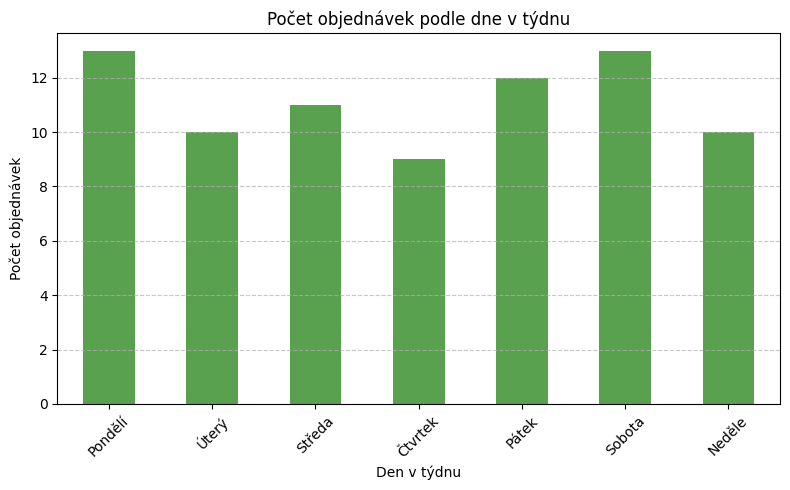

**Graf znázorňuje počet unikátních objednávek podle jednotlivých dnů v týdnu. Z grafu můžeme identifikovat nejsilnější a nejslabší dny z pohledu prodejů.**

In [166]:
# Graf
denni_objednavky_cz = df_dny.set_index("Den v týdnu")["Počet objednávek"]
denni_objednavky_cz.plot(kind='bar', figsize=(8, 5), color='#59a14f')

plt.title("Počet objednávek podle dne v týdnu")
plt.ylabel("Počet objednávek")
plt.xlabel("Den v týdnu")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


display(Markdown(
    "**Graf znázorňuje počet unikátních objednávek podle jednotlivých dnů v týdnu. Z grafu můžeme identifikovat nejsilnější a nejslabší dny z pohledu prodejů.**"
))



**2) Který den v týdnu má nejvíce objednávek?**

* Pondělí a sobota jsou nejsilnější dny (13 objednávek).



In [167]:
# Najdeme objednávky, kde je televize
transakce_s_tv = spojeno[spojeno["Category"] == "Televize"]["Transaction ID"].unique()

# Co všechno se v těchto objednávkách ještě nachází
ostatni = spojeno[spojeno["Transaction ID"].isin(transakce_s_tv)]

# Výpočet četnosti dalších kategorií a převedení na DataFrame
kategorie_s_televizi = ostatni["Category"].value_counts().reset_index()
kategorie_s_televizi.columns = ["Kategorie", "Počet výskytů"]

display(HTML("<h4>Nejčastěji kombinované kategorie s televizí</h4>"))
display(kategorie_s_televizi)

display(Markdown(
    "**Analýza identifikuje, které další kategorie produktů se nejčastěji objevují ve stejné objednávce jako televize. Výsledek ukazuje počet výskytů jednotlivých kategorií v rámci těchto objednávek a pomáhá odhalit nejčastější kombinace produktů.**"
))



,Kategorie,Počet výskytů
0,Televize,32
1,Audio,13
2,Mobilní telefony,12
3,Tablety,7


**Analýza identifikuje, které další kategorie produktů se nejčastěji objevují ve stejné objednávce jako televize. Výsledek ukazuje počet výskytů jednotlivých kategorií v rámci těchto objednávek a pomáhá odhalit nejčastější kombinace produktů.**

**3) Co se nejčastěji prodává spolu s televizí?**

* Nejčastěji se s televizemi prodává kategorie Audio (např. reproduktory), následovaná mobilními telefony.




In [168]:
cutoff = pd.to_datetime("2022-03-18")
pred = spojeno[spojeno["Date"] < cutoff]
po = spojeno[spojeno["Date"] >= cutoff]

# Porovnání
print("Počet objednávek před:", pred["Transaction ID"].nunique())
print("Počet objednávek po:", po["Transaction ID"].nunique())
print("Obrat před:", pred["Obrat"].sum())
print("Obrat po:", po["Obrat"].sum())
print("Průměrná hodnota objednávky před:", pred.groupby("Transaction ID")["Obrat"].sum().mean())
print("Průměrná hodnota objednávky po:", po.groupby("Transaction ID")["Obrat"].sum().mean())


Počet objednávek před: 45
Počet objednávek po: 33
Obrat před: 1270960
Obrat po: 1589210
Průměrná hodnota objednávky před: 28243.555555555555
Průměrná hodnota objednávky po: 48157.878787878784


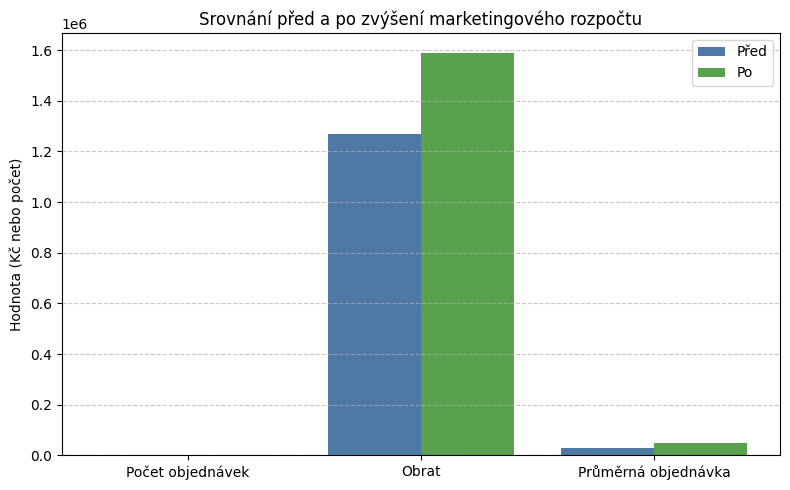

**Graf porovnává počet objednávek, celkový obrat a průměrnou hodnotu objednávky před a po navýšení marketingového rozpočtu 18. 3. 2022.**

In [169]:
# Tvoje proměnné před/po (before, after)

plt.figure(figsize=(8, 5))
bars1 = plt.bar(x, before, width=0.4, label='Před', align='center', color='#4e79a7')
bars2 = plt.bar([p + 0.4 for p in x], after, width=0.4, label='Po', align='center', color='#59a14f')

plt.xticks([p + 0.2 for p in x], labels)
plt.title("Srovnání před a po zvýšení marketingového rozpočtu")
plt.ylabel("Hodnota (Kč nebo počet)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

from IPython.display import Markdown, display

display(Markdown(
    "**Graf porovnává počet objednávek, celkový obrat a průměrnou hodnotu objednávky před a po navýšení marketingového rozpočtu 18. 3. 2022.**"
))


**4) Pomohlo navýšení marketingového rozpočtu 18. 3. 2022?**

*  Počet objednávek klesl, ale obrat vzrostl (z 1,27 mil. na 1,59 mil. Kč).
*  Průměrná hodnota objednávky výrazně vzrostla – z 28 244 Kč na 48 158 Kč.

**Závěr:** Navýšení rozpočtu vedlo k nižšímu počtu objednávek, ale vyšším tržbám a výrazně vyšší průměrné útratě, což značí úspěšnější cílení reklamy a vyšší efektivitu kampaní.



**5) Má pořadí produktů vliv na prodej?**

Abychom tuto otázku mohli v budoucnu zodpovědět, je potřeba začít systematicky sledovat chování uživatelů na webu, zejména:

* Pozici produktu ve výpisu v okamžiku zobrazení (např. 1. pozice, 2. pozice…),

* Počet zobrazení každého produktu (tzv. impressions),

* Počet kliknutí na detail produktu (tzv. click events),

* CTR (Click-Through Rate) – tedy poměr kliknutí ku zobrazením,

* Konverzní poměr – kolik zobrazení/kliknutí vedlo k nákupu.

Tyto údaje můžeme získat pomocí: Google Analytics 4 (GA4), Google Tag Manageru nebo vlastního měření na frontendu e-shopu.

**6) As a data analyst working with online marketing data and Google Analytics 4 (GA4), you are aware of the challenges posed by GDPR regulations and cookie consent requirements on data collection. Using a Large Language Model (like ChatGPT), outline the key impacts of GDPR and cookie consent on web analytics data collection. Then, generate a plan to mitigate these data limitations while ensuring compliance with GDPR. Provide the specific prompts you used with the LLM and summarize the responses you received.**



*   **Prompts used with LLM:**

Act as a senior data analyst working in the EU digital marketing space. I am evaluating the impact of GDPR and cookie consent mechanisms on data collection within Google Analytics 4 (GA4). Please provide a comprehensive analysis of the following:

1.   Legal constraints imposed by GDPR on GA4 tracking, especially regarding personal data, consent types (explicit vs. implicit), and lawful basis for data processing.
2.   How cookie consent mechanisms affect user tracking, session data continuity, and attribution modeling in GA4.
3.   Technical best practices for setting up GA4 and Google Tag Manager (GTM) in a GDPR-compliant manner, including consent mode, triggers, and tag sequencing.
4.   How to implement GA4's Consent Mode (Advanced version) and how its conversion modeling compensates for missing data due to consent refusal.
5. Examples of server-side tagging, first-party data strategies, and how organizations can combine them with GA4 to improve data quality without breaching compliance.
6. Summarize all recommendations in a table with: risk level, mitigation strategy, and implementation complexity (low/medium/high).


**Report: Impact of GDPR and Cookie Consent on GA4 Data Collection**


GDPR Constraints on GA4 Tracking
The General Data Protection Regulation (GDPR) enforces strict rules on data collection through analytics tools like Google Analytics 4 (GA4). Tracking user behavior in GA4 involves processing personal data (e.g., cookies, IP addresses, user IDs), which legally requires:

*   Explicit user consent before any tracking occurs.
*   Minimization or anonymization of personally identifiable information.
*   Use of "Consent" as the lawful basis for data processing (legitimate interest is typically insufficient for analytics).



In [175]:
from IPython.display import HTML

# Defining the table content
data = {
    "Area of Impact": [
        "User Tracking",
        "Sessions",
        "Attribution",
        "Reporting Accuracy"
    ],
    "Effect of Consent Refusal": [
        "Returning users cannot be recognized",
        "Sessions are not recorded",
        "Channel/source data is lost",
        "Traffic and conversions are underreported"
    ]
}

# Creating the table
df = pd.DataFrame(data)

# Adding table title and explanation, then render the table without index
html_content = """
<h4> Impact of Cookie Consent Mechanisms</h4>
<p>When a user declines cookie consent, GA4 is unable to track the session or behavior, resulting in:</p>
""" + df.to_html(index=False)

# Displayig
HTML(html_content)



Area of Impact,Effect of Consent Refusal
User Tracking,Returning users cannot be recognized
Sessions,Sessions are not recorded
Attribution,Channel/source data is lost
Reporting Accuracy,Traffic and conversions are underreported


These limitations significantly reduce data completeness and distort marketing attribution models.



**Recommended Mitigation Strategies**

To ensure compliance while preserving data insights, the following technical and strategic actions are recommended:

1. Consent Management Platform (CMP)

*   Implement a GDPR-compliant CMP (e.g., Cookiebot, OneTrust).

*   Configure Google Tag Manager (GTM) to trigger GA4 tags only after user consent is granted.

2. Google Analytics 4 Consent Mode (Advanced)


*  Enables GA4 to adjust data collection based on user consent status.
*  Activates conversion modeling to estimate user behavior from non-consenting traffic.

3. Server-Side Tagging

*   Routes data through an organization-controlled server before sending it to GA4.

*   Allows greater control over anonymization and compliance.

4. First-Party Data Strategy

*   Encourage users to log in, subscribe, or register.
*   Enables privacy-compliant tracking based on user-provided identifiers.

In [174]:
data = {
    "Issue": [
        "Consent loss",
        "Attribution gaps",
        "Legal non-compliance",
        "Data loss"
    ],
    "Risk Level": [
        "High",
        "High",
        "Critical",
        "Medium"
    ],
    "Recommended Mitigation": [
        "CMP + GA4 Consent Mode",
        "Modeled conversions in GA4",
        "Data anonymization + audit logs",
        "Server-side tracking + first-party data"
    ],
    "Implementation Complexity": [
        "Medium",
        "Low",
        "Medium",
        "High"
    ]
}

df = pd.DataFrame(data)
HTML(df.to_html(index=False))

# HTML content with a title and the table
html_table = "<h4> Summary Table: Risk Assessment & Mitigation</h4>" + df.to_html(index=False)

# Table with the title
display(HTML(html_table))


Issue,Risk Level,Recommended Mitigation,Implementation Complexity
Consent loss,High,CMP + GA4 Consent Mode,Medium
Attribution gaps,High,Modeled conversions in GA4,Low
Legal non-compliance,Critical,Data anonymization + audit logs,Medium
Data loss,Medium,Server-side tracking + first-party data,High


**Conclusion**

While GDPR and cookie consent regulations limit traditional analytics tracking, organizations can maintain effective and privacy-compliant measurement by implementing consent-aware tools (GA4 Consent Mode, CMPs), shifting to server-side infrastructure, and focusing on first-party data strategies.

These solutions ensure legal compliance without sacrificing essential marketing and user behavior insights.